# LIME

This notebook will code a self-made explainable AI-method modelled after the LIME-method: https://arxiv.org/abs/1806.08049
It uses a local surrogate model to explain how each feature influences the classifier. The original LIME suggests a linear surrogate, but because I consider binary models here, I use a logistic regression instead (which is a Generalised Linear Model GLM and therefore also "linear" in a certain sense). The LIME-method is model-agnostic, i.e. it is supposed to work on any classifier. Hence, I test it on a Neural Network and a Random Forest.

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from tensorflow import keras 
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
random.seed(1234)
import lime
from lime import lime_tabular
import pandas as pd

# Reproducibility
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [2]:
xsize = 10000
X = np.random.rand(xsize,10)
# only X[:,0], X[:,4], X[:,1] and X[:,2] are relevant and their relevance is in that order


In [3]:
x = np.arange(0.2,0.8, 0.01)
y_boundary = -50/9 * (x-0.5)**2 + 0.5 # -0.5+2*x**2#

In [4]:
def Label(x):
    # takes x0, ... x9 and assigns label
    
    if x[1] >-50/9 * (x[0]-0.5)**2 + 0.5: # mostly 1      -0.5+2*x[0]**2.:  #
        out = np.random.choice(2,1, p=[0.1, 0.9])
    
    else: # mostly 0
        out = np.random.choice(2,1, p=[0.95, 0.05])
    return(out)

In [5]:
y_NN = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    y_NN[i] = Label(X[i,:])

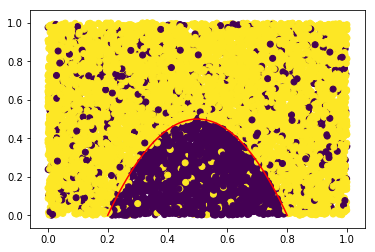

In [6]:
plt.scatter(X[:,0], X[:,1], c = y_NN)
plt.plot(x, y_boundary, c="red")
plt.show()


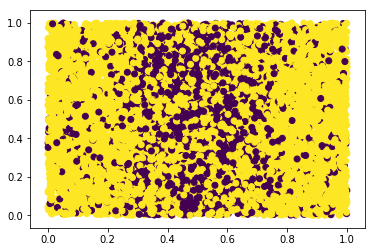

In [7]:
plt.scatter(X[:,0], X[:,2], c = y_NN)
#plt.plot(x, y_boundary, c="red")
plt.show()


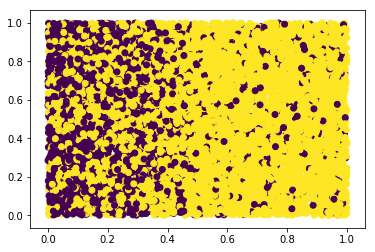

In [8]:
plt.scatter(X[:,1], X[:,3], c = y_NN)
#plt.plot(x, y_boundary, c="red")
plt.show()


In [9]:
# Get Train, Test and Validation Data
X_trainNN, X_testNN, y_trainNN, y_testNN = sklearn.model_selection.train_test_split( X, y_NN, 
                                                                                    test_size=0.66, 
                                                                                    random_state=42)

X_testNN, X_valNN, y_testNN, y_valNN = sklearn.model_selection.train_test_split( X_testNN, y_testNN, 
                                                                                    test_size=0.5, 
                                                                                    random_state=42)

In [10]:
# define the keras model
NN = keras.models.Sequential()
NN.add(keras.layers.Dense(12, input_dim=X_trainNN.shape[1], activation='relu'))
NN.add(keras.layers.Dense(50, activation='relu'))
NN.add(keras.layers.Dense(20, activation='relu'))
NN.add(keras.layers.Dense(1, activation='sigmoid'))
# compile the keras model
NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
NN.fit(X_trainNN,y_trainNN, epochs=100, batch_size=10,validation_split=0.2)
# evaluate the keras model
_, accuracy = NN.evaluate(X_testNN,y_testNN)
print('Accuracy: %.2f' % (accuracy*100))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2720 samples, validate on 680 samples
Epoch 1/100
  10/2720 [..............................] - ETA: 20s - loss: 0.6365 - acc: 0.7000

2021-11-10 11:33:02.820467: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-11-10 11:33:02.840881: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3299990000 Hz
2021-11-10 11:33:02.841518: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x584f050 executing computations on platform Host. Devices:
2021-11-10 11:33:02.841530: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2021-11-10 11:33:02.867228: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or se

2720/2720 [==============================] - 0s 96us/sample - loss: 0.5474 - acc: 0.7364 - val_loss: 0.5372 - val_acc: 0.6956
Epoch 2/100
2720/2720 [==============================] - 0s 59us/sample - loss: 0.5002 - acc: 0.7507 - val_loss: 0.5046 - val_acc: 0.7368
Epoch 3/100
2720/2720 [==============================] - 0s 61us/sample - loss: 0.4921 - acc: 0.7654 - val_loss: 0.4959 - val_acc: 0.7456
Epoch 4/100
2720/2720 [==============================] - 0s 61us/sample - loss: 0.4809 - acc: 0.7713 - val_loss: 0.5211 - val_acc: 0.7309
Epoch 5/100
2720/2720 [==============================] - 0s 57us/sample - loss: 0.4664 - acc: 0.7949 - val_loss: 0.4632 - val_acc: 0.7809
Epoch 6/100
2720/2720 [==============================] - 0s 57us/sample - loss: 0.4472 - acc: 0.8143 - val_loss: 0.4399 - val_acc: 0.8059
Epoch 7/100
2720/2720 [==============================] - 0s 61us/sample - loss: 0.4226 - acc: 0.8371 - val_loss: 0.4304 - val_acc: 0.8147
Epoch 8/100
2720/2720 [=======================

2720/2720 [==============================] - 0s 52us/sample - loss: 0.2992 - acc: 0.8974 - val_loss: 0.3581 - val_acc: 0.8824
Epoch 61/100
2720/2720 [==============================] - 0s 53us/sample - loss: 0.2962 - acc: 0.9026 - val_loss: 0.3721 - val_acc: 0.8765
Epoch 62/100
2720/2720 [==============================] - 0s 53us/sample - loss: 0.2981 - acc: 0.9007 - val_loss: 0.3692 - val_acc: 0.8779
Epoch 63/100
2720/2720 [==============================] - 0s 53us/sample - loss: 0.2974 - acc: 0.8996 - val_loss: 0.3573 - val_acc: 0.8912
Epoch 64/100
2720/2720 [==============================] - 0s 53us/sample - loss: 0.2948 - acc: 0.9000 - val_loss: 0.3621 - val_acc: 0.8868
Epoch 65/100
2720/2720 [==============================] - 0s 52us/sample - loss: 0.2946 - acc: 0.9000 - val_loss: 0.3688 - val_acc: 0.8838
Epoch 66/100
2720/2720 [==============================] - 0s 52us/sample - loss: 0.2942 - acc: 0.9004 - val_loss: 0.3604 - val_acc: 0.8926
Epoch 67/100
2720/2720 [================

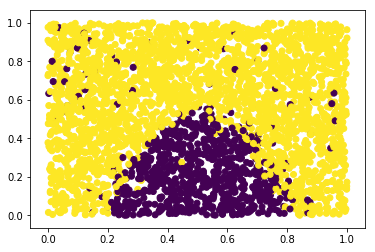

In [11]:
predNN = NN.predict(X_valNN)
predNN = (predNN > np.mean(predNN))
predNN = 1*predNN.reshape(-1)
plt.scatter(X_valNN[:,0], X_valNN[:,1], c = predNN)
plt.show()

## And with a Random Forest

In [12]:
RF = RandomForestClassifier(n_estimators=1000,random_state=4)
RF = RF.fit(X_trainNN, y_trainNN)
preds = RF.predict(X_valNN)
print(np.mean(np.abs(preds-y_valNN)))

0.11424242424242424


In [13]:
predRF = RF.predict(X_valNN)
predRF = 1*(predRF > np.mean(predRF))
predRF = predRF.reshape(-1)
print(predRF.shape)


(3300,)


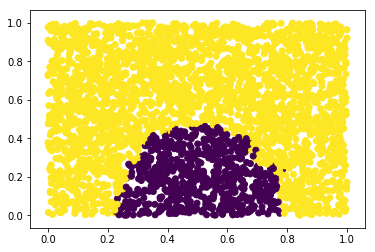

In [14]:
plt.scatter(X_valNN[:,0], X_valNN[:,1], c = predRF)
plt.show()

### LIME

In [15]:
def Dist(x, X):
    # calculate L2-distances between x and all instances in X (X does not contain x!!)
    return(((X-x)**2).sum(axis=1))

def ExpKernel(D):
    # takes an array of nonnegative distances and transforms it into a normalised probability "density"
    d = np.exp(- D**2.)
    return(d/np.sum(d))

def LocalLinear(i, K, Kernel, X, y):
    #  Local "logistic-linear" approximation of f(X[i,:]) = y[i]
    #  with K close instances (K> X.shape[1]) and y = prediction from our Model
    # could also be done via e.g. a linear regression, but log-regression makes more sense for binary models
    if K<=X.shape[1]:
        raise ValueError("K must be at least as large as X.shape[1]+1")
        
        
    x = X[i,:]
    notx = (np.arange(X.shape[0] ) !=i)
    otherX = X[notx,:]
    othery = y[notx]
    
    Distances = Dist(x,otherX) # calculate Distances between x and all other instances
    Threshold = np.partition(Distances, K)[K] # threshold for the K closest instances
    
    LRin = (Distances <=K) # now apply threshold
    LRX = otherX[LRin,:]
    LRy = othery[LRin]
    sample_weight = Kernel(Distances) # calculate the weights for linear regression
    
    
    #regr = LinearRegression()
    regr = sklearn.linear_model.LogisticRegression(random_state=3)
    regr.fit(LRX,LRy, sample_weight)
    return(regr)

##### Test on NN

In [16]:
out = 0
for i in range(X_valNN.shape[0]):
    out +=np.abs(LocalLinear(i, 20,ExpKernel, X_valNN, predNN).coef_)
    #print(LocalLinear(i, 20,ExpKernel, X_valNN, predNN).coef_)
np.set_printoptions(precision=3)
print(out)

[[ 42.425 190.149  12.355  12.74   10.365   6.349   9.892   6.781  10.816
   17.039]]


##### Test on Random Forest

In [17]:
out = 0
for i in range(X_valNN.shape[0]):
    out +=np.abs(LocalLinear(i, 20,ExpKernel, X_valNN, predRF).coef_)
    #print(LocalLinear(i, 20,ExpKernel, X_valNN, predNN).coef_)
print(out)

[[ 41.209 184.902   7.276   5.766   6.712   6.215  10.372   6.379   6.445
    7.79 ]]


In both cases, LIME correctly identifies that X[:,0] and X[:,1] are more relevant than the other features. Interestingly, it attributes a much higher importance to X[:,1]. Note that one has to look at the absolute values of the cumulative LIME-coefficients, otherwise X[:,0]-coefficients with changing signs will cancel each other out (see below).

#### Individual instances for the Neural Net with LIME
Let's look at two specific data points and see what LIME does here.

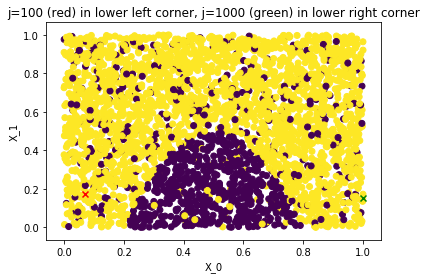

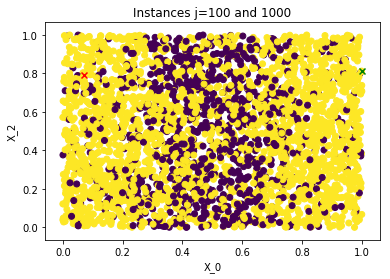

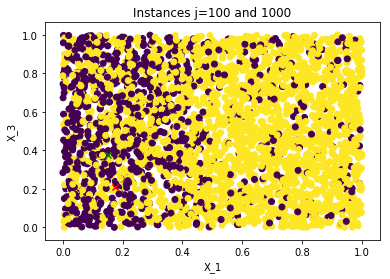

In [18]:
j = 100 
j1 = 1000 

plt.scatter(X_valNN[:,0], X_valNN[:,1], c = y_valNN)
plt.scatter(X_valNN[j,0], 
            X_valNN[j,1], 
            c = "red", 
            marker = "x")
plt.scatter(X_valNN[j1,0], 
            X_valNN[j1,1], 
            c = "green", 
            marker = "x")
plt.title("j=100 (red) in lower left corner, j=1000 (green) in lower right corner") # Lower left-hand corner
plt.xlabel("X_0")
plt.ylabel("X_1")
plt.show()

plt.scatter(X_valNN[:,0], X_valNN[:,2], c = y_valNN)
plt.scatter(X_valNN[j,0], 
            X_valNN[j,2], 
            c = "red", 
            marker = "x")
plt.scatter(X_valNN[j1,0], 
            X_valNN[j1,2], 
            c = "green", 
            marker = "x")
plt.title("Instances j=100 and 1000")
plt.xlabel("X_0")
plt.ylabel("X_2")
plt.show()

plt.scatter(X_valNN[:,1], X_valNN[:,3], c = y_valNN)
plt.scatter(X_valNN[j,1], 
            X_valNN[j,3], 
            c = "red", 
            marker = "x")
plt.scatter(X_valNN[j1,1], 
            X_valNN[j1,3], 
            c = "green", 
            marker = "x")
plt.title("Instances j=100 and 1000")
plt.xlabel("X_1")
plt.ylabel("X_3")
plt.show()

In [19]:
# Look at the local logistic-linear coefficients
print(LocalLinear(j, 20,ExpKernel, X_valNN, predNN).coef_)
print(LocalLinear(j1, 20,ExpKernel, X_valNN, predNN).coef_)


[[-0.028  0.062 -0.001 -0.007 -0.003 -0.003  0.001 -0.004  0.002 -0.007]]
[[ 0.035  0.059 -0.002 -0.006 -0.002 -0.002 -0.004 -0.005 -0.003 -0.006]]


We can see that the two instances have different logistic-linear coefficients: The 8 superfluous coefficients are all close to 0 (which is good). The coefficient for x_1 is positive in both cases because wherever in the feature space you are, a higher x_1 will always push you away from the purple region of Zeros. However, the coefficients' signs for x_0 change: In the x_0-x_1-plot, the instance j=100 is to the left of the purple region and hence, its x_0-coefficient is negative (the further left, the further it gets away from the Zeros). For j=1000, it's the complete opposite (positive sign) because its to the right of the purple region.
Therefore, to measure the cumulative impact of the LIME-x_0-feature across all instances, one has to look at the absolute values. Else, just summing the coefficients would cancel them out due to changing signs.

## Now we try to use the package LIME

Tutorial on YouTube https://www.youtube.com/watch?v=eUu9xwraeqo
Documentation https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_tabular

In [44]:
# I think we need some pandas dataframes here, unfortunately
dfTrain = pd.DataFrame(data = X_trainNN)
dfTest = pd.DataFrame(data=X_testNN)
print(dfTrain.columns)

RangeIndex(start=0, stop=10, step=1)


In [45]:
# define the keras model for Data Frame
NNdf = keras.models.Sequential()
NNdf.add(keras.layers.Dense(12, input_dim=X_trainNN.shape[1], activation='relu'))
NNdf.add(keras.layers.Dense(50, activation='relu'))
NNdf.add(keras.layers.Dense(20, activation='relu'))
NNdf.add(keras.layers.Dense(1, activation='sigmoid'))
# compile the keras model
NNdf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
NNdf.fit(dfTrain,y_trainNN, epochs=100, batch_size=10,validation_split=0.2)
# evaluate the keras model
_, accuracy = NNdf.evaluate(dfTest,y_testNN)
print('Accuracy: %.2f' % (accuracy*100))

Train on 272 samples, validate on 68 samples
Epoch 1/100
272/272 [==============================] - 0s 387us/sample - loss: 0.7067 - acc: 0.4375 - val_loss: 0.6967 - val_acc: 0.5000
Epoch 2/100
272/272 [==============================] - 0s 62us/sample - loss: 0.6812 - acc: 0.6029 - val_loss: 0.6723 - val_acc: 0.6765
Epoch 3/100
272/272 [==============================] - 0s 63us/sample - loss: 0.6562 - acc: 0.6838 - val_loss: 0.6399 - val_acc: 0.7206
Epoch 4/100
272/272 [==============================] - 0s 63us/sample - loss: 0.6232 - acc: 0.7059 - val_loss: 0.6096 - val_acc: 0.7794
Epoch 5/100
272/272 [==============================] - 0s 59us/sample - loss: 0.5815 - acc: 0.7757 - val_loss: 0.5717 - val_acc: 0.7941
Epoch 6/100
272/272 [==============================] - 0s 62us/sample - loss: 0.5228 - acc: 0.8199 - val_loss: 0.5272 - val_acc: 0.7500
Epoch 7/100
272/272 [==============================] - 0s 60us/sample - loss: 0.4737 - acc: 0.8088 - val_loss: 0.4858 - val_acc: 0.8088
Ep

272/272 [==============================] - 0s 56us/sample - loss: 0.1069 - acc: 0.9375 - val_loss: 0.3182 - val_acc: 0.8529
Epoch 61/100
272/272 [==============================] - 0s 56us/sample - loss: 0.1034 - acc: 0.9559 - val_loss: 0.3423 - val_acc: 0.8529
Epoch 62/100
272/272 [==============================] - 0s 56us/sample - loss: 0.1137 - acc: 0.9632 - val_loss: 0.3396 - val_acc: 0.8676
Epoch 63/100
272/272 [==============================] - 0s 57us/sample - loss: 0.1240 - acc: 0.9485 - val_loss: 0.3377 - val_acc: 0.8676
Epoch 64/100
272/272 [==============================] - 0s 57us/sample - loss: 0.1161 - acc: 0.9449 - val_loss: 0.3167 - val_acc: 0.8676
Epoch 65/100
272/272 [==============================] - 0s 57us/sample - loss: 0.0963 - acc: 0.9669 - val_loss: 0.3502 - val_acc: 0.8676
Epoch 66/100
272/272 [==============================] - 0s 56us/sample - loss: 0.0953 - acc: 0.9596 - val_loss: 0.3293 - val_acc: 0.8676
Epoch 67/100
272/272 [==============================] 

In [94]:

explainer = lime_tabular.LimeTabularExplainer(training_data = np.array(dfTrain),# data in LimeTabularExplainer has to be numpy array
                                              mode =  "classification", # "regression" would also be possible
                                              feature_names = dfTrain.columns)

TypeError: __init__() got an unexpected keyword argument 'labels'

In [96]:
# evaluate one instance
j = 100
exp = explainer.explain_instance(data_row = X_testNN[j,:],#data_row= np.array(dfTest.iloc[j]).reshape(1,-1),
                                labels=(0,), # cf   https://github.com/marcotcr/lime/issues/428
                                predict_fn = NN.predict)
exp.show_in_notebook(show_table=True)

/home/users/t_wand01/.local/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
